# Image classification using CNN (CIFAR10 dataset)

In [42]:
#import paskages 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix , classification_report

import tensorflow as tf
from tensorflow.keras import datasets , layers  , models

In [21]:
#Load data
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [22]:
#Shape train data 
X_train.shape

(50000, 32, 32, 3)

In [23]:
#Shape tesr data 
X_test.shape

(10000, 32, 32, 3)

In [24]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [25]:
#reshape y_train 
y_train = y_train.reshape(-1,)

In [26]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [35]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

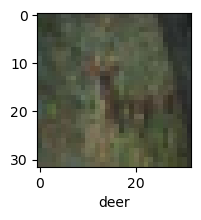

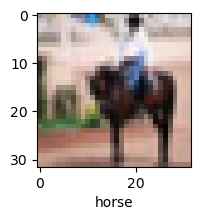

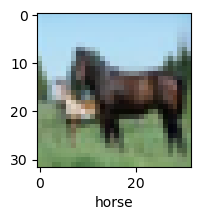

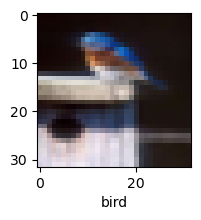

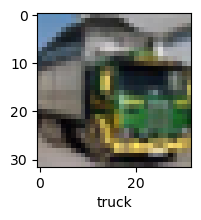

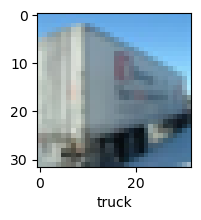

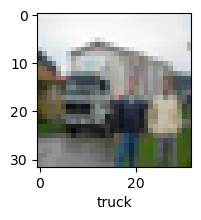

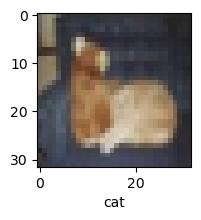

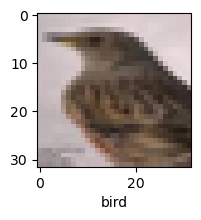

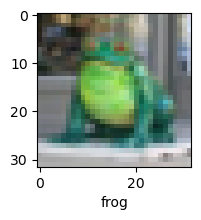

In [38]:
for i in range(10,20):
    plot_sample(X_train, y_train,i)

In [39]:
#Normalizing data images
X_train = X_train / 255.0
X_test = X_test / 255.0

### Build Model 


In [40]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 81s 51ms/step - loss: 1.8114 - accuracy: 0.3546
Epoch 2/5
1563/1563 [==============================] - 85s 55ms/step - loss: 1.6237 - accuracy: 0.4302
Epoch 3/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.5427 - accuracy: 0.4556
Epoch 4/5
1563/1563 [==============================] - 82s 53ms/step - loss: 1.4828 - accuracy: 0.4764
Epoch 5/5
1563/1563 [==============================] - 76s 49ms/step - loss: 1.4343 - accuracy: 0.4955


In [43]:
y_pred = ann.predict(X_test)
y_pred_classes =[np.argmax(element) for element in y_pred]

313/313 [==============================] - 5s 15ms/step


In [44]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.58      0.53      1000
           1       0.63      0.61      0.62      1000
           2       0.32      0.51      0.39      1000
           3       0.33      0.41      0.36      1000
           4       0.46      0.29      0.36      1000
           5       0.40      0.34      0.37      1000
           6       0.56      0.48      0.52      1000
           7       0.62      0.47      0.53      1000
           8       0.54      0.68      0.60      1000
           9       0.65      0.43      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



#### build a convolutional neural network

In [46]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [48]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=5)


Epoch 1/5
1563/1563 [==============================] - 79s 50ms/step - loss: 1.3242 - accuracy: 0.5281
Epoch 2/5
1563/1563 [==============================] - 85s 55ms/step - loss: 1.0708 - accuracy: 0.6258
Epoch 3/5
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9551 - accuracy: 0.6681
Epoch 4/5
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8778 - accuracy: 0.6951
Epoch 5/5
1563/1563 [==============================] - 54s 35ms/step - loss: 0.8146 - accuracy: 0.7178


With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy

In [49]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9285 - accuracy: 0.6825


[0.9285027384757996, 0.6825000047683716]

In [50]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[1.51731574e-03, 6.22128427e-04, 6.76061492e-03, 6.97187185e-01,
        1.82226056e-03, 2.51234770e-01, 2.07433496e-02, 2.72989215e-04,
        1.90256219e-02, 8.13718420e-04],
       [1.82986837e-02, 2.36089781e-01, 3.26543268e-05, 1.20319455e-05,
        2.42954275e-06, 4.16848167e-07, 1.06717710e-06, 2.75752061e-08,
        7.45019019e-01, 5.43914735e-04],
       [3.64183299e-02, 5.76278567e-01, 2.36551720e-03, 4.99054138e-03,
        1.03532278e-03, 5.25037700e-04, 6.71069545e-04, 7.81817871e-05,
        3.66351753e-01, 1.12857008e-02],
       [5.72117507e-01, 4.21373397e-02, 1.61383990e-02, 1.24359364e-03,
        5.85983470e-02, 4.23653073e-05, 8.99714825e-04, 4.13340225e-04,
        3.06260347e-01, 2.14898516e-03],
       [4.03348531e-05, 7.68177924e-05, 1.02566043e-02, 1.62847847e-01,
        1.39873430e-01, 1.30785303e-02, 6.73220575e-01, 1.44555728e-04,
        4.55245201e-04, 5.99216537e-06]], dtype=float32)

In [51]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [52]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)